In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Regression Task**


**1.Exploratory Data Analysis and Data Understanding**


In [2]:
import pandas as pd
file_path = '/content/drive/My Drive/car_price_prediction.csv'
df = pd.read_csv(file_path)
print(df.head(10))

         ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET   Equinox        2011       Jeep   
2  45774419   8467     -        HONDA       FIT        2006  Hatchback   
3  45769185   3607   862         FORD    Escape        2011       Jeep   
4  45809263  11726   446        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891      HYUNDAI  Santa FE        2016       Jeep   
6  45656768   1803   761       TOYOTA     Prius        2010  Hatchback   
7  45816158    549   751      HYUNDAI    Sonata        2013      Sedan   
8  45641395   1098   394       TOYOTA     Camry        2014      Sedan   
9  45756839  26657     -        LEXUS    RX 350        2007       Jeep   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  19200

               Price          Levy  Manufacturer         Model    Prod. year  \
count   13418.000000  13418.000000  13418.000000  13418.000000  13418.000000   
mean    17298.492175    906.838128     31.999702    872.563124   2013.138024   
std     19370.756312    461.867051     17.531020    391.138885      3.050424   
min         1.000000     87.000000      0.000000      1.000000   1965.000000   
25%      3607.000000    640.000000     23.000000    595.000000   2011.000000   
50%     13500.000000    781.000000     23.000000    834.000000   2013.000000   
75%     23436.000000   1058.000000     54.000000   1237.000000   2015.000000   
max    872946.000000  11714.000000     62.000000   1589.000000   2020.000000   

           Category  Leather interior     Fuel type  Engine volume  \
count  13418.000000      13418.000000  13418.000000   13418.000000   
mean       6.385005          0.855642      3.377180       2.317208   
std        2.739042          0.351466      1.765446       0.872821   

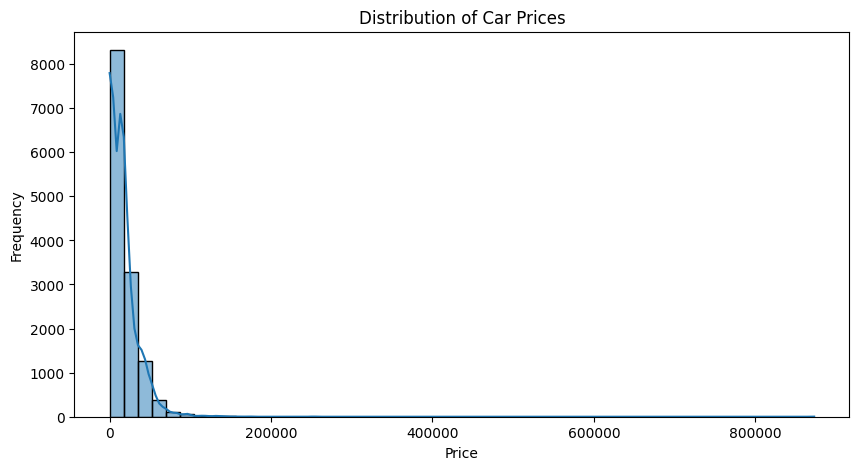

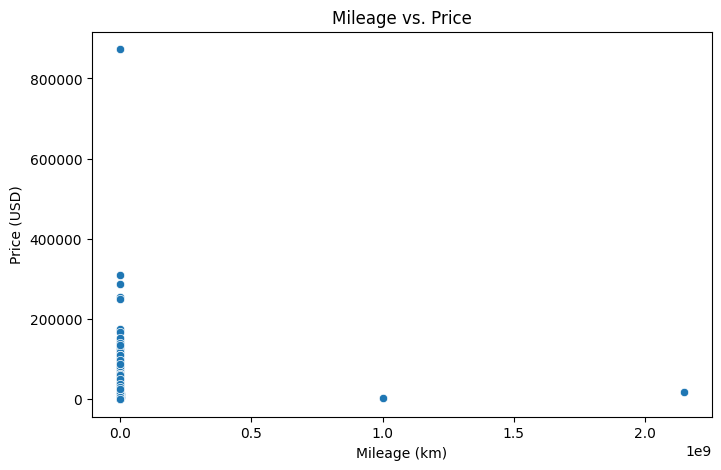

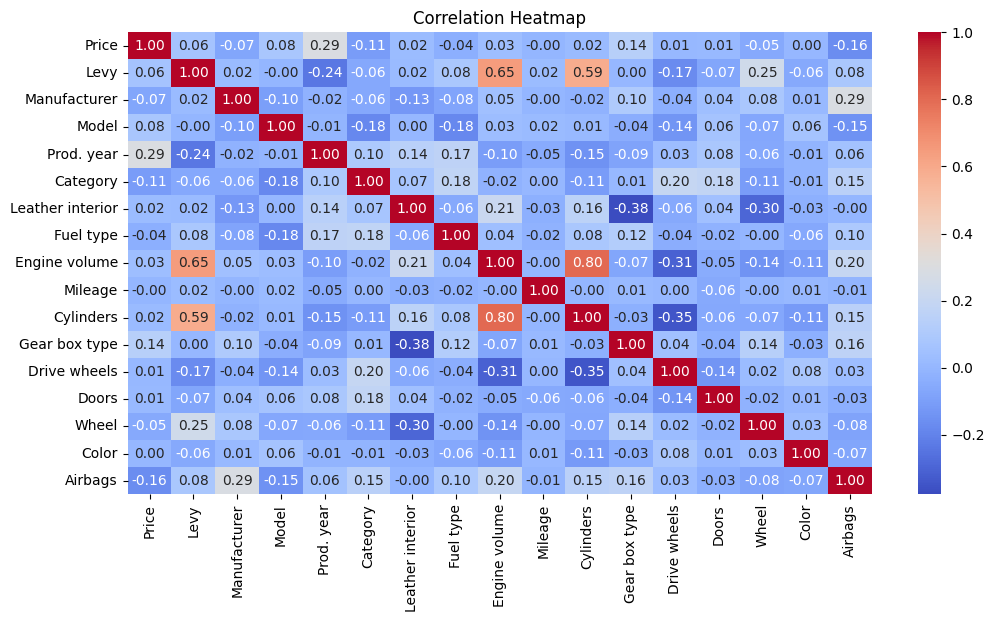

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Data Cleaning
# Convert 'Levy' column to numeric (replace '-' with NaN)
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

# Ensure 'Mileage' column is treated as string before processing
df['Mileage'] = df['Mileage'].astype(str)
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=False).astype(float)

# Ensure 'Engine volume' column is treated as string before processing
df['Engine volume'] = df['Engine volume'].astype(str)
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '', regex=False).astype(float)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Leather interior', 'Doors']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Drop unnecessary columns
df.drop(columns=['ID'], inplace=True, errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# Summary Statistics
print(df.describe())

# Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot of Mileage vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Mileage'], y=df['Price'])
plt.title("Mileage vs. Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (USD)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **2.Build a Model from Scratch**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Data Preprocessing
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
# Ensure 'Mileage' column is treated as string before processing
df['Mileage'] = df['Mileage'].astype(str)
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=False).astype(float)
# Ensure 'Engine volume' column is treated as string before processing
df['Engine volume'] = df['Engine volume'].astype(str)
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '', regex=False).astype(float)
# Drop unnecessary columns
df.drop(columns=['ID'], inplace=True, errors='ignore')

df.dropna(inplace=True)  # Remove NaN values

# Select Features and Target
X = df[['Prod. year', 'Mileage', 'Cylinders', 'Engine volume', 'Airbags']]
y = df['Price']

# Normalize Features
X = (X - X.mean()) / X.std()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Weights and Bias
w = np.zeros(X_train.shape[1])
b = 0

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent
m = len(y_train)
for epoch in range(epochs):
    y_pred = np.dot(X_train, w) + b
    error = y_pred - y_train

    # Compute Gradients
    dw = (1/m) * np.dot(X_train.T, error)
    db = (1/m) * np.sum(error)

    # Update Parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Compute Loss (MSE)
    mse = (1/m) * np.sum(error**2)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse:.4f}")

# Evaluate Model
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = np.dot(X_test, w) + b
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")


Epoch 0: MSE = 693726306.0176
Epoch 100: MSE = 392089358.2165
Epoch 200: MSE = 350051161.0339
Epoch 300: MSE = 344077985.4551
Epoch 400: MSE = 343193575.8399
Epoch 500: MSE = 343044464.8570
Epoch 600: MSE = 343008294.5758
Epoch 700: MSE = 342993157.4898
Epoch 800: MSE = 342984182.5141
Epoch 900: MSE = 342978210.9002
Test MSE: 265805570.8552
Test R-squared: 0.1182


**3. Build a Primary Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Preprocessing
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

# Ensure 'Mileage' and 'Engine volume' are strings before replacing
df['Mileage'] = df['Mileage'].astype(str).str.replace(' km', '', regex=False).astype(float)
df['Engine volume'] = df['Engine volume'].astype(str).str.replace(' Turbo', '', regex=False).astype(float)

# Drop unnecessary column 'ID' if it exists
df.drop(columns=['ID'], inplace=True, errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# Select Features and Target
X = df[['Prod. year', 'Mileage', 'Cylinders', 'Engine volume', 'Airbags']]
y = df['Price']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate Model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R-squared": r2}

# Print Results
for model, metrics in results.items():
    print(f"{model} Performance:")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}\n")


Linear Regression Performance:
MAE: 11757.6831
RMSE: 16309.6363
R-squared: 0.1176

Random Forest Regressor Performance:
MAE: 5939.3500
RMSE: 12476.8990
R-squared: 0.4836



**4.Hyper-parameter Optimization with Cross-Validation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


# Drop rows with missing target values
df = df.dropna(subset=['Price'])

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Reduce dataset size for faster processing (50% of data)
df = df.sample(frac=0.5, random_state=42)

# Define features and target
X = df.drop(columns=['Price'])
y = df['Price']

# Handle any remaining missing values
X = X.fillna(X.median())

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define models and hyperparameters (smaller search space)
ridge_params = {'alpha': [1, 10, 100]}
lasso_params = {'alpha': [1, 10, 100]}
rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

# Use RandomizedSearchCV for faster tuning
ridge_grid = RandomizedSearchCV(Ridge(), ridge_params, cv=2, scoring='r2', n_iter=2, n_jobs=-1, random_state=42)
lasso_grid = RandomizedSearchCV(Lasso(max_iter=2000), lasso_params, cv=2, scoring='r2', n_iter=2, n_jobs=-1, random_state=42)
rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42, warm_start=True), rf_params, cv=2, scoring='r2', n_iter=2, n_jobs=-1, random_state=42)

# Fit models (Much Faster!)
ridge_grid.fit(X, y)
lasso_grid.fit(X, y)
rf_random.fit(X, y)

# Print best hyperparameters
print("Best Ridge parameters:", ridge_grid.best_params_)
print("Best Lasso parameters:", lasso_grid.best_params_)
print("Best Random Forest parameters:", rf_random.best_params_)


Best Ridge parameters: {'alpha': 10}
Best Lasso parameters: {'alpha': 10}
Best Random Forest parameters: {'n_estimators': 100, 'max_depth': None}


**5.Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV
import numpy as np

# Define features and target
X = df.drop(columns=['Price'])
y = df['Price']

# Apply SelectKBest (Univariate feature selection)
k_best = SelectKBest(score_func=f_regression, k=5)
X_selected_kbest = k_best.fit_transform(X, y)
selected_features_kbest = X.columns[k_best.get_support()]
print("Selected features using SelectKBest:", selected_features_kbest)

# Apply Lasso for feature selection
lasso = LassoCV(cv=5).fit(X, y)
lasso_coef = np.abs(lasso.coef_)
selected_features_lasso = X.columns[lasso_coef > 0]
print("Selected features using Lasso:", selected_features_lasso)


Selected features using SelectKBest: Index(['Prod. year', 'Model_Santa FE', 'Category_Jeep', 'Fuel type_Diesel',
       'Fuel type_Hybrid'],
      dtype='object')
Selected features using Lasso: Index(['Mileage'], dtype='object')


6.Final Model




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the selected features
selected_features = ['Prod. year', 'Model_Santa FE_True', 'Category_Jeep_True', 'Fuel type_Diesel_True', 'Fuel type_Hybrid_True', 'Mileage']

# Ensure that the selected features are present in the dataframe
available_features = [feature for feature in selected_features if feature in df.columns]

# Add missing features with zeros to the dataframe
for feature in set(selected_features) - set(available_features):
    df[feature] = 0

# Selected features and target
X = df[selected_features]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['Prod. year', 'Mileage']] = scaler.fit_transform(X_train[['Prod. year', 'Mileage']])
X_test[['Prod. year', 'Mileage']] = scaler.transform(X_test[['Prod. year', 'Mileage']])

# Define models with optimal hyperparameters
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=1)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}\n")

# Print evaluation results
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Ridge Regression Performance:
R² Score: 0.04
MSE: 283834375.31
MAE: 11975.76

Lasso Regression Performance:
R² Score: 0.04
MSE: 283872353.24
MAE: 11976.93

Random Forest Regressor Performance:
R² Score: 0.17
MSE: 245781850.30
MAE: 10523.75

